In [74]:
import numpy as py
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [95]:
dataset = pd.read_csv("C:/Users/Supreeth/Desktop/Sample.csv")
dataset['dt'] = pd.to_datetime(dataset['dt'],infer_datetime_format=True)
indexedDataset = dataset.set_index(['dt'])

In [76]:
from datetime import datetime
indexedDataset.head(5)

,AvgTemp
dt,
1900-01-01,2.268
1900-01-02,0.898
1900-01-03,5.731
1900-01-04,7.659
1900-01-05,10.306


In [77]:
from datetime import datetime
indexedDataset.tail(5)

,AvgTemp
dt,
2010-01-08,15.653
2010-01-09,12.726
2010-01-10,8.708
2010-01-11,2.294
2010-01-12,1.676


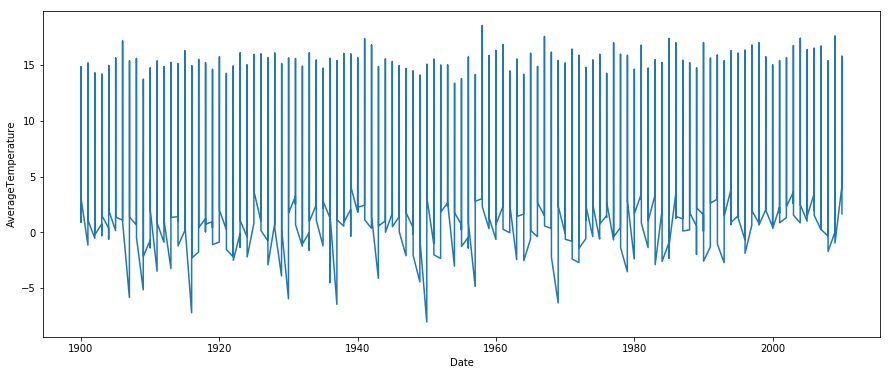

In [78]:
plt.xlabel("Date")
plt.ylabel("AverageTemperature")
plt.plot(indexedDataset)

In [79]:
#Determining rolling statistics
rolmean = indexedDataset.rolling(window=12).mean()
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)


             AvgTemp
dt                  
1900-01-01       NaN
1900-01-02       NaN
1900-01-03       NaN
1900-01-04       NaN
1900-01-05       NaN
1900-01-06       NaN
1900-01-07       NaN
1900-01-08       NaN
1900-01-09       NaN
1900-01-10       NaN
1900-01-11       NaN
1900-01-12  7.604500
1901-01-01  7.320833
1901-01-02  7.338417
1901-01-03  7.210917
1901-01-04  7.005250
1901-01-05  6.976500
1901-01-06  6.807250
1901-01-07  6.682833
1901-01-08  6.826750
1901-01-09  6.799917
1901-01-10  6.990333
1901-01-11  7.275083
1901-01-12  7.115167
1902-01-01  7.165750
1902-01-02  7.331167
1902-01-03  7.251333
1902-01-04  7.346583
1902-01-05  7.391917
1902-01-06  7.494500
...              ...
2008-01-07  7.179250
2008-01-08  7.201833
2008-01-09  7.252083
2008-01-10  7.279333
2008-01-11  7.468000
2008-01-12  7.304583
2009-01-01  7.330250
2009-01-02  7.238083
2009-01-03  7.141000
2009-01-04  7.295417
2009-01-05  7.272667
2009-01-06  7.515250
2009-01-07  7.717083
2009-01-08  7.748917
2009-01-09  7

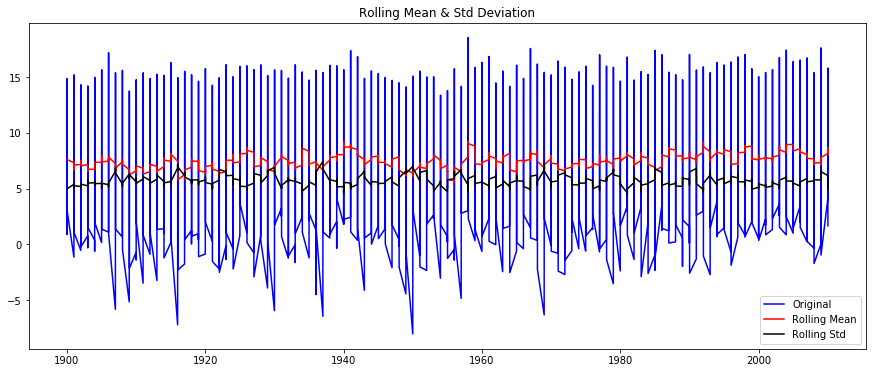

In [80]:
orig = plt.plot(indexedDataset,color='blue',label='Original')
mean = plt.plot(rolmean,color='red',label='Rolling Mean')
std = plt.plot(rolstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Std Deviation')
plt.show(block=False)

In [81]:
from statsmodels.tsa.stattools import adfuller
#Perform Dickey-Fuller test
print('Results of Dickey-Fuller Test')
dftest = adfuller(indexedDataset['AvgTemp'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test
Test Statistic                   -4.921135
p-value                           0.000032
#Lags Used                       23.000000
Number of Observations Used    1308.000000
Critical Value (1%)              -3.435359
Critical Value (5%)              -2.863752
Critical Value (10%)             -2.567948
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


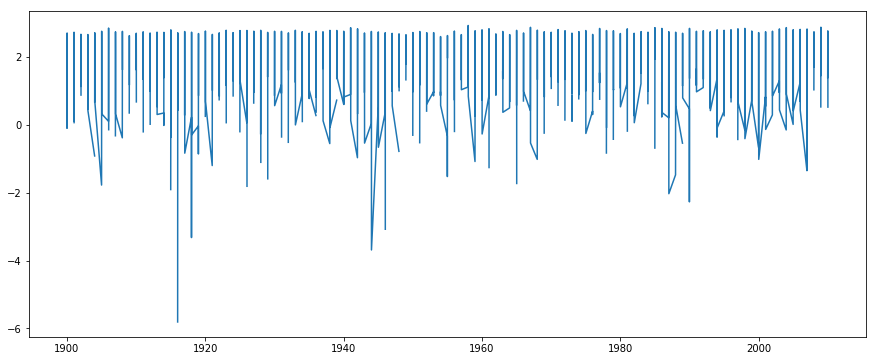

In [96]:
import numpy as np
#Estimating Trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

In [97]:
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
ts_log = np.log(indexedDataset)
#plt.plot(ts_log)
decomposition = seasonal_decompose(indexedDataset_logScale)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: This function does not handle missing values

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import pandas as pd
ts_log = np.log(indexedDataset)
plt.plot(ts_log)

#Moving Average
rolmean = indexedDataset.rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(rolmean, color='red')

          


ImportError: No module named 'statsmodels'

In [85]:
ts_log_moving_avg_diff = ts_log - rolmean
ts_log_moving_avg_diff.head(12)

,AvgTemp
dt,
1900-01-01,NaN
1900-01-02,NaN
1900-01-03,NaN
1900-01-04,NaN
1900-01-05,NaN
1900-01-06,NaN
1900-01-07,NaN
1900-01-08,NaN
1900-01-09,NaN


Results of Dickey-Fuller Test
Test Statistic                   -4.778846
p-value                           0.000060
#Lags Used                       23.000000
Number of Observations Used    1194.000000
Critical Value (1%)              -3.435839
Critical Value (5%)              -2.863964
Critical Value (10%)             -2.568060
dtype: float64


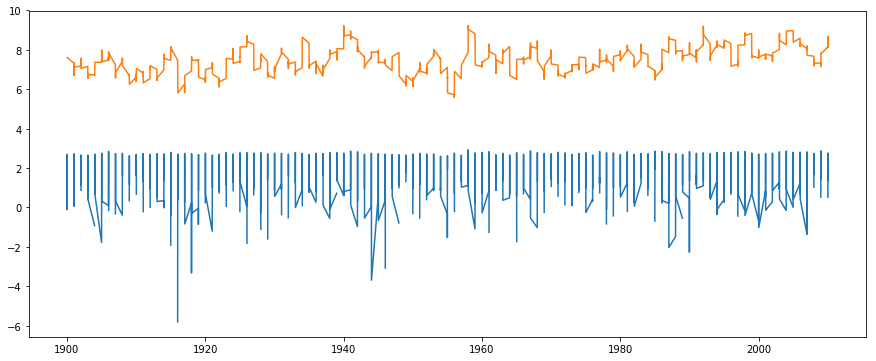

In [86]:
#drop these NaN values and check the plots to test stationarity

from statsmodels.tsa.stattools import adfuller
#Perform Dickey-Fuller test
print('Results of Dickey-Fuller Test')
ts_log_moving_avg_diff.dropna(inplace=True)
dftest = adfuller(ts_log_moving_avg_diff['AvgTemp'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)
plt.plot(ts_log, label='Original')
plt.plot(rolmean, label='Original')

In [87]:
import numpy as np
#expwighted_avg = pd.DataFrame.ewma(ts_log, halflife=12)
df_test = pd.DataFrame(ts_log = np.arange(0,100))
df_test_ewma = df_test.ewm(span=2).mean()
plt.plot(ts_log)
plt.plot(df_test_ewma, color='red')

TypeError: __init__() got an unexpected keyword argument 'ts_log'

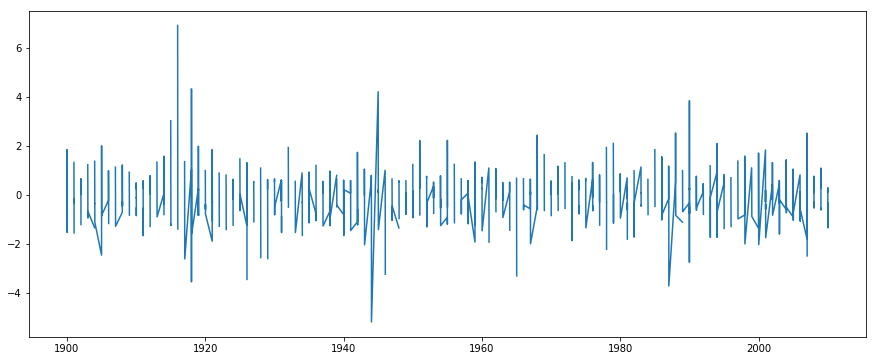

In [88]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In [68]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

NameError: name 'test_stationarity' is not defined

In [7]:
import tkinter as tk
from tkinter import *
import tkinter.ttk
from tkinter.filedialog import askopenfilename
from tkinter.filedialog import asksaveasfilename
import Pmw 
import os, csv 
import pandas as pd
 
# Designing window for registration
 
def register():
    global register_screen
    register_screen = Toplevel(main_screen)
    register_screen.title("Register")
    register_screen.geometry("300x250")
 
    global username
    global password
    global username_entry
    global password_entry
    username = StringVar()
    password = StringVar()
 
    Label(register_screen, text="Please enter details below", bg="blue").pack()
    Label(register_screen, text="").pack()
    username_lable = Label(register_screen, text="Username * ")
    username_lable.pack()
    username_entry = Entry(register_screen, textvariable=username)
    username_entry.pack()
    password_lable = Label(register_screen, text="Password * ")
    password_lable.pack()
    password_entry = Entry(register_screen, textvariable=password, show='*')
    password_entry.pack()
    Label(register_screen, text="").pack()
    Button(register_screen, text="Register", width=10, height=1, bg="blue", command = register_user).pack()
 
 
# Designing window for login 
 
def login():
    global login_screen
    login_screen = Toplevel(main_screen)
    login_screen.title("Login")
    login_screen.geometry("300x250")
    Label(login_screen, text="Please enter details below to login").pack()
    Label(login_screen, text="").pack()
 
    global username_verify
    global password_verify
 
    username_verify = StringVar()
    password_verify = StringVar()
 
    global username_login_entry
    global password_login_entry
 
    Label(login_screen, text="Username * ").pack()
    username_login_entry = Entry(login_screen, textvariable=username_verify)
    username_login_entry.pack()
    Label(login_screen, text="").pack()
    Label(login_screen, text="Password * ").pack()
    password_login_entry = Entry(login_screen, textvariable=password_verify, show= '*')
    password_login_entry.pack()
    Label(login_screen, text="").pack()
    Button(login_screen, text="Login", width=10, height=1, command = login_verify).pack()
 
# Implementing event on register button
 
def register_user():
 
    username_info = username.get()
    password_info = password.get()
 
    file = open(username_info, "w")
    file.write(username_info + "\n")
    file.write(password_info)
    file.close()
 
    username_entry.delete(0, END)
    password_entry.delete(0, END)
 
    Label(register_screen, text="Registration Success", fg="green", font=("calibri", 11)).pack()
 
# Implementing event on login button 
 
def login_verify():
    username1 = username_verify.get()
    password1 = password_verify.get()
    username_login_entry.delete(0, END)
    password_login_entry.delete(0, END)
 
    list_of_files = os.listdir()
    if username1 in list_of_files:
        file1 = open(username1, "r")
        verify = file1.read().splitlines()
        if password1 in verify:
            login_sucess()
 
        else:
            password_not_recognised()
 
    else:
        user_not_found()
 
# Designing popup for login success
 
def login_sucess():
    global login_success_screen
    login_success_screen = Toplevel(login_screen)
    login_success_screen.title("Success")
    login_success_screen.geometry("150x100")
    Label(login_success_screen, text="Login Success").pack()
    Button(login_success_screen, text="OK", command=call_second_frame_on_top).pack()
    

def import_csv_data():
    global v
    csv_file_path = askopenfilename()
    print(csv_file_path)
    v.set(csv_file_path)
    df = pd.read_csv(csv_file_path)
    print(df.head())

def create_widgets_in_second_frame():
    # Create the label for the frame
    second_window_label = tkinter.ttk.Label(second_frame, text='Window 2')
    second_window_label.grid(column=0, row=0, pady=10, padx=10, sticky=(tkinter.N))
    
    #root = tk.Tk()
    tkinter.Label(second_frame, text='File Path').grid(row=0, column=0)
    v = tkinter.StringVar()
    entry = tkinter.Entry(second_frame, textvariable=v).grid(row=0, column=1)
    

    # Create the button for the frame
    second_window_back_button = tkinter.Button(second_frame, text = "Back", command = call_first_frame_on_top)
    second_window_back_button.grid(column=0, row=1, pady=10, sticky=(tkinter.N))
    second_window_browse_button = tkinter.Button(second_frame, text='Browse Data Set',command = import_csv_data)
    second_window_browse_button.grid(column=1, row=1, pady=10, sticky=(tkinter.N))
    second_window_next_button = tkinter.Button(second_frame, text = "Quit", command = quit_program)
    second_window_next_button.grid(column=2, row=1, pady=10, sticky=(tkinter.N))
    

def quit_program():
    root_window.destroy()
    
def call_first_frame_on_top():
    # This function can be called only from the second window.
    # Hide the second window and show the first window.
    second_frame.grid_forget()
    main_account_screen()
    #first_frame.grid(column=0, row=0, padx=20, pady=5, sticky=(tkinter.W, tkinter.N, tkinter.E))

def call_second_frame_on_top():
    # This function can be called from the first and third windows.
    # Hide the first and third windows and show the second window.
    #first_frame.grid_forget()
    #third_frame.grid_forget()
    second_frame.grid(column=0, row=0, padx=20, pady=5, sticky=(tkinter.W, tkinter.N, tkinter.E))
 
def password_not_recognised():
    global password_not_recog_screen
    password_not_recog_screen = Toplevel(login_screen)
    password_not_recog_screen.title("Success")
    password_not_recog_screen.geometry("150x100")
    Label(password_not_recog_screen, text="Invalid Password ").pack()
    Button(password_not_recog_screen, text="OK", command=delete_password_not_recognised).pack()
 
# Designing popup for user not found
 
def user_not_found():
    global user_not_found_screen
    user_not_found_screen = Toplevel(login_screen)
    user_not_found_screen.title("Success")
    user_not_found_screen.geometry("150x100")
    Label(user_not_found_screen, text="User Not Found").pack()
    Button(user_not_found_screen, text="OK", command=delete_user_not_found_screen).pack()
 
# Deleting popups
 
def delete_login_success():
    login_success_screen.destroy()
 
 
def delete_password_not_recognised():
    password_not_recog_screen.destroy()
 
 
def delete_user_not_found_screen():
    user_not_found_screen.destroy()
 
 
# Designing Main(first) window
 
def main_account_screen():
    global main_screen
    main_screen = Tk()
    main_screen.geometry("400x400")
    main_screen.title("Welcome To Aircraft Crash Visualization")
    window_width = 400
    window_heigth = 400


    second_frame=tkinter.ttk.Frame(main_screen, width=window_width, height=window_heigth)
    second_frame['borderwidth'] = 2
    second_frame['relief'] = 'sunken'
    second_frame.grid(column=0, row=0, padx=20, pady=5, sticky=(tkinter.W, tkinter.N, tkinter.E))



# Create all widgets to all frames

    create_widgets_in_second_frame()

    Label(text="Select Your Choice", bg="blue", width="300", height="2", font=("Calibri", 13)).pack()
    Label(text="").pack()
    Button(text="Login", height="2", width="30", command = login).pack()
    Label(text="").pack()
    Button(text="Register", height="2", width="30", command=register).pack()
    
    root_window = tkinter.Tk()
    
    # Define window size
   
    #create_widgets_in_first_frame()

# Hide all frames in reverse order, but leave first frame visible (unhidden).
#third_frame.grid_forget()
    second_frame.grid_forget()
    main_screen.mainloop()
 
 
main_account_screen()

NameError: name 'second_frame' is not defined

In [8]:
import tkinter
import tkinter as tk
import tkinter.ttk
from tkinter.filedialog import askopenfilename
from tkinter.filedialog import asksaveasfilename
import Pmw 
import os, csv 
import pandas as pd

def import_csv_data():
        #f1 = file_verify.get()
        global file_verify
        #file_entry.delete(0, END)
        csv_file_path = askopenfilename()
        print(csv_file_path)
        #print(file_verify)
        #file_verify.set(csv_file_path)
        df = pd.read_csv(csv_file_path)
        print(df.head())
        
 
# Designing window for registration
 
def register():
    global register_screen
    register_screen = Toplevel(main_screen)
    register_screen.title("Register")
    register_screen.geometry("300x250")
 
    global username
    global password
    global username_entry
    global password_entry
    username = StringVar()
    password = StringVar()
 
    Label(register_screen, text="Please enter details below", bg="blue").pack()
    Label(register_screen, text="").pack()
    username_lable = Label(register_screen, text="Username * ")
    username_lable.pack()
    username_entry = Entry(register_screen, textvariable=username)
    username_entry.pack()
    password_lable = Label(register_screen, text="Password * ")
    password_lable.pack()
    password_entry = Entry(register_screen, textvariable=password, show='*')
    password_entry.pack()
    Label(register_screen, text="").pack()
    Button(register_screen, text="Register", width=10, height=1, bg="blue", command = register_user).pack()
 
 
# Designing window for login 
 
def login():
    global login_screen
    login_screen = Toplevel(main_screen)
    login_screen.title("Login")
    login_screen.geometry("300x250")
    Label(login_screen, text="Please enter details below to login").pack()
    Label(login_screen, text="").pack()
 
    global username_verify
    global password_verify
 
    username_verify = StringVar()
    password_verify = StringVar()
 
    global username_login_entry
    global password_login_entry
 
    Label(login_screen, text="Username * ").pack()
    username_login_entry = Entry(login_screen, textvariable=username_verify)
    username_login_entry.pack()
    Label(login_screen, text="").pack()
    Label(login_screen, text="Password * ").pack()
    password_login_entry = Entry(login_screen, textvariable=password_verify, show= '*')
    password_login_entry.pack()
    Label(login_screen, text="").pack()
    Button(login_screen, text="Login", width=10, height=1, command = login_verify).pack()
 
# Implementing event on register button
 
def register_user():
 
    username_info = username.get()
    password_info = password.get()
 
    file = open(username_info, "w")
    file.write(username_info + "\n")
    file.write(password_info)
    file.close()
 
    username_entry.delete(0, END)
    password_entry.delete(0, END)
 
    Label(register_screen, text="Registration Success", fg="green", font=("calibri", 11)).pack()
 
# Implementing event on login button 
 
def login_verify():
    username1 = username_verify.get()
    password1 = password_verify.get()
    username_login_entry.delete(0, END)
    password_login_entry.delete(0, END)
 
    list_of_files = os.listdir()
    if username1 in list_of_files:
        file1 = open(username1, "r")
        verify = file1.read().splitlines()
        if password1 in verify:
            login_sucess()
 
        else:
            password_not_recognised()
 
    else:
        user_not_found()
        
def login_sucess():
    global login_success_screen
    login_success_screen = Toplevel(login_screen)
    login_success_screen.title("Success")
    login_success_screen.geometry("150x100")
    Label(login_success_screen, text="Login Success").pack()
    Button(login_success_screen, text="OK", command=openfilewindow).pack()

def openfilewindow():
    global open_filescreen
    open_filescreen = Toplevel(login_screen)
    open_filescreen.title("Open File")
    #open_filescreen.geometry("300x250")
    
    #Label(open_filescreen, text="").pack()
 
    
#     global password_verify
 
    file_verify = StringVar()
#     password_verify = StringVar()
 
    global file_entry
#     global password_login_entry
 
    #tkinter.Label(open_filescreen, text='File Path').grid(row=0, column=0)
   # v = tkinter.StringVar()
   # entry = tkinter.Entry(open_filescreen, textvariable=v).grid(row=0, column=1)
    Label(open_filescreen, text="File Path").grid(row =1, column =0)
    file_entry = Entry(open_filescreen, textvariable = file_verify).grid(row =1, column =1)
    #print(file_verify)
    #Label(open_filescreen, text="").pack()
    Button(open_filescreen, text="Browse Dataset", width=15, height=1, command = import_csv_data).grid(row =3, column =1)
    #Label(open_filescreen, text="").pack()
    Button(open_filescreen, text="Quit", width=15, height=1, command = quit_program).grid(row =3, column =2)
 


def quit_program():
    open_filescreen.destroy()
    login_success_screen.destroy()
    login_screen.destroy()
    
def password_not_recognised():
    global password_not_recog_screen
    password_not_recog_screen = Toplevel(login_screen)
    password_not_recog_screen.title("Success")
    password_not_recog_screen.geometry("150x100")
    Label(password_not_recog_screen, text="Invalid Password ").pack()
    Button(password_not_recog_screen, text="OK", command=delete_password_not_recognised).pack()
 
# Designing popup for user not found
 
def user_not_found():
    global user_not_found_screen
    user_not_found_screen = Toplevel(login_screen)
    user_not_found_screen.title("Success")
    user_not_found_screen.geometry("150x100")
    Label(user_not_found_screen, text="User Not Found").pack()
    Button(user_not_found_screen, text="OK", command=delete_user_not_found_screen).pack()
 
# Deleting popups
 
def delete_login_success():
    login_success_screen.destroy()
 
 
def delete_password_not_recognised():
    password_not_recog_screen.destroy()
 
 
def delete_user_not_found_screen():
    user_not_found_screen.destroy()
 
 
# Designing Main(first) window
 
def main_account_screen():
    global main_screen
    main_screen = Tk()
    main_screen.geometry("800x800")
    main_screen.title("Welcome To Aircraft Crash Visualization")
    Label(main_screen, text="Select Your Choice", bg="blue", width="300", height="2", font=("Calibri", 13)).pack()
    Label(main_screen, text="").pack()
    #Label(text="").pack()
    Button(main_screen, text="Login", height="2", width="30", command = login).pack()
    Label(main_screen, text="").pack()
    Button(main_screen, text="Register", height="2", width="30", command=register).pack()
 
    main_screen.mainloop()
 
 
main_account_screen()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Supreeth\.conda\envs\tfdeeplearning\lib\tkinter\__init__.py", line 1558, in __call__
    return self.func(*args)
  File "<ipython-input-8-eb6719df7f57>", line 64, in login
    username_verify = StringVar()
  File "C:\Users\Supreeth\.conda\envs\tfdeeplearning\lib\tkinter\__init__.py", line 334, in __init__
    Variable.__init__(self, master, value, name)
  File "C:\Users\Supreeth\.conda\envs\tfdeeplearning\lib\tkinter\__init__.py", line 233, in __init__
    self._root = master._root()
AttributeError: 'NoneType' object has no attribute '_root'


C:/Users/Supreeth/Documents/Airplane_Crashes_and_Fatalities_Since_1908.csv
         Date   Time                            Location  \
0  09/17/1908  17:18                 Fort Myer, Virginia   
1  07/12/1912  06:30             AtlantiCity, New Jersey   
2  08/06/1913    NaN  Victoria, British Columbia, Canada   
3  09/09/1913  18:30                  Over the North Sea   
4  10/17/1913  10:30          Near Johannisthal, Germany   

                 Operator Flight #          Route                    Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1    Military - U.S. Navy      NaN    Test flight               Dirigible   
2                 Private        -            NaN        Curtiss seaplane   
3  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   
4  Military - German Navy      NaN            NaN  Zeppelin L-2 (airship)   

  Registration cn/In  Aboard  Fatalities  Ground  \
0          NaN     1     2.0         1.0     0.0 

C:\Users\Supreeth\.conda\envs\tfdeeplearning\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


3260.1229236331587


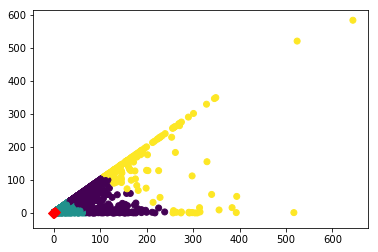

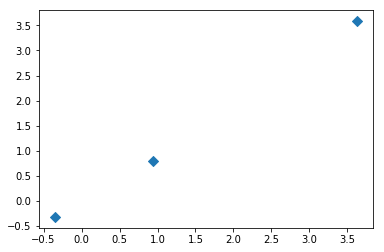

3260.1229236331587


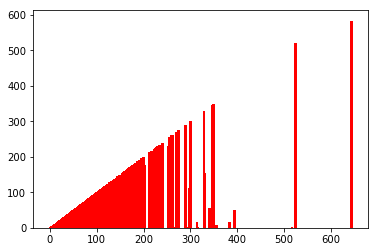

In [9]:
import tkinter
import tkinter as tk
import tkinter.ttk
from tkinter.filedialog import askopenfilename
from tkinter.filedialog import asksaveasfilename
import Pmw 
import os, csv 
import pandas as pd

def import_csv_data():
        #f1 = file_verify.get()
        global file_verify
        #file_entry.delete(0, END)
        csv_file_path = askopenfilename()
        print(csv_file_path)
        #print(file_verify)
        #file_verify.set(csv_file_path)
        df = pd.read_csv(csv_file_path)
        print(df.head())
        #We can see that Flight#, Time, Route, cn/In have a lot of null values which will affect our Data ,
        #so Hence we clean it by dropping the respective columns
        df = df.drop('Flight #',axis=1)
        df = df.drop('Time',axis=1)
        df = df.drop('Route',axis=1)
        df = df.drop('cn/In',axis=1)
        df = df.drop('Summary',axis=1)
        df.notnull()
        df.info()

        #Having a look at the data
        X = df.drop('Location',axis=1)
        X = X.drop('Type',axis=1)
        X = X.drop('Date',axis=1)
        X = X.drop('Operator',axis=1)
        X = X.drop('Ground',axis=1)
        X = X.drop('Registration',axis=1)
        X = X.dropna()
        xc=X
        X = X.values
        y = (df['Type'].values)


        #Xamples=[]
        #Xamples[:,0] = X
        #Xamples[:,1] = Y

        print(X)

        #We are Preparing the Data to be fed for K-Means Clustering Algorithm, as it supports only numeric values. 
        #We can see that only Ground, Aboard and Fatalities have a numeric value from the description in the above cell.
        samples = X.astype(int)

        print(samples)

        from sklearn.cluster import KMeans
        from sklearn.preprocessing import normalize
        from sklearn.preprocessing import StandardScaler
        from sklearn.pipeline import make_pipeline 

        scaler = StandardScaler() 
        kmeans = KMeans(n_clusters=3)

        model = make_pipeline(scaler,kmeans ) 
        #nm = normalize(1)

        #samples = nm(samples)


        model.fit(samples)
        labels = model.predict(samples)

        import matplotlib.pyplot as plt 

        xs = samples[:,0]
        ys = samples[:,1]

        plt.scatter(xs, ys, c=labels)

        centroids = kmeans.cluster_centers_

        centroids_x = centroids[:,0]
        centroids_y = centroids[:,1]

        plt.scatter(centroids_x,centroids_y,color='Red',marker='D',s=50)

        print(kmeans.inertia_)


        plt.show()


        #Performing K-Means Clustering over the Dataset. We have chosen a cluster size of 3. 
        #The Data was first Standardized and then fed into the K-Means Clustering Algorithm via a Pipeline.
        #The Pipeline ensures that automatic flow of data between diffrent steps.
        #centroids = kmeans.cluster_centers_

        centroids_x = centroids[:,0]
        centroids_y = centroids[:,1]

        plt.scatter(centroids_x,centroids_y,marker='D',s=50)
        plt.show()

        #Getting the Inertia Value. The lower the better. 
        #Inertia gives us the sum of the distance of each value from the center of it's cluster.
        #We usually plot the Inertia value for different number of clusters and ideally select the one that lies on the elbow.
        print(kmeans.inertia_)

        fig,ax = plt.subplots()
        ax.bar( xs,ys, width=6, color='r')

        plt.show()

        #We can see very well that there are many outliers in the Data. 
        #These are the miracle cases in which some of the passenger managed to survive the crash.
        #These are the same crashes which lie in cluster number 3 in the K-Means Cluster indicating a outlier trend.
        
 
# Designing window for registration
 
def register():
    global register_screen
    register_screen = Toplevel(main_screen)
    register_screen.title("Register")
    register_screen.geometry("300x250")
 
    global username
    global password
    global username_entry
    global password_entry
    username = StringVar()
    password = StringVar()
 
    Label(register_screen, text="Please enter details below", bg="blue").pack()
    Label(register_screen, text="").pack()
    username_lable = Label(register_screen, text="Username * ")
    username_lable.pack()
    username_entry = Entry(register_screen, textvariable=username)
    username_entry.pack()
    password_lable = Label(register_screen, text="Password * ")
    password_lable.pack()
    password_entry = Entry(register_screen, textvariable=password, show='*')
    password_entry.pack()
    Label(register_screen, text="").pack()
    Button(register_screen, text="Register", width=10, height=1, bg="blue", command = register_user).pack()
 
 
# Designing window for login 
 
def login():
    global login_screen
    login_screen = Toplevel(main_screen)
    login_screen.title("Login")
    login_screen.geometry("300x250")
    Label(login_screen, text="Please enter details below to login").pack()
    Label(login_screen, text="").pack()
 
    global username_verify
    global password_verify
 
    username_verify = StringVar()
    password_verify = StringVar()
 
    global username_login_entry
    global password_login_entry
 
    Label(login_screen, text="Username * ").pack()
    username_login_entry = Entry(login_screen, textvariable=username_verify)
    username_login_entry.pack()
    Label(login_screen, text="").pack()
    Label(login_screen, text="Password * ").pack()
    password_login_entry = Entry(login_screen, textvariable=password_verify, show= '*')
    password_login_entry.pack()
    Label(login_screen, text="").pack()
    Button(login_screen, text="Login", width=10, height=1, command = login_verify).pack()
 
# Implementing event on register button
 
def register_user():
 
    username_info = username.get()
    password_info = password.get()
 
    file = open(username_info, "w")
    file.write(username_info + "\n")
    file.write(password_info)
    file.close()
 
    username_entry.delete(0, END)
    password_entry.delete(0, END)
 
    Label(register_screen, text="Registration Success", fg="green", font=("calibri", 11)).pack()
 
# Implementing event on login button 
 
def login_verify():
    username1 = username_verify.get()
    password1 = password_verify.get()
    username_login_entry.delete(0, END)
    password_login_entry.delete(0, END)
 
    list_of_files = os.listdir()
    if username1 in list_of_files:
        file1 = open(username1, "r")
        verify = file1.read().splitlines()
        if password1 in verify:
            login_sucess()
 
        else:
            password_not_recognised()
 
    else:
        user_not_found()
        
def login_sucess():
    global login_success_screen
    login_success_screen = Toplevel(login_screen)
    login_success_screen.title("Success")
    login_success_screen.geometry("150x100")
    Label(login_success_screen, text="Login Success").pack()
    Button(login_success_screen, text="OK", command=openfilewindow).pack()

def openfilewindow():
    global open_filescreen
    open_filescreen = Toplevel(login_screen)
    open_filescreen.title("Open File")
    
#     global password_verify
 
    file_verify = StringVar()
#     password_verify = StringVar()
 
    global file_entry

    Label(open_filescreen, text="File Path").grid(row =1, column =0)
    file_entry = Entry(open_filescreen, textvariable = file_verify).grid(row =1, column =1)
    #print(file_verify)
    #Label(open_filescreen, text="").pack()
    Button(open_filescreen, text="Browse Dataset", width=15, height=1, command = import_csv_data).grid(row =3, column =1)
    #Label(open_filescreen, text="").pack()
    Button(open_filescreen, text="Quit", width=15, height=1, command = quit_program).grid(row =3, column =2)
 
def quit_program():
    open_filescreen.destroy()
    login_success_screen.destroy()
    login_screen.destroy()
    
def password_not_recognised():
    global password_not_recog_screen
    password_not_recog_screen = Toplevel(login_screen)
    password_not_recog_screen.title("Success")
    password_not_recog_screen.geometry("150x100")
    Label(password_not_recog_screen, text="Invalid Password ").pack()
    Button(password_not_recog_screen, text="OK", command=delete_password_not_recognised).pack()
 
# Designing popup for user not found
 
def user_not_found():
    global user_not_found_screen
    user_not_found_screen = Toplevel(login_screen)
    user_not_found_screen.title("Success")
    user_not_found_screen.geometry("150x100")
    Label(user_not_found_screen, text="User Not Found").pack()
    Button(user_not_found_screen, text="OK", command=delete_user_not_found_screen).pack()
 
# Deleting popups
 
def delete_login_success():
    login_success_screen.destroy()
 
 
def delete_password_not_recognised():
    password_not_recog_screen.destroy()
 
 
def delete_user_not_found_screen():
    user_not_found_screen.destroy()
 
 
# Designing Main(first) window
 
def main_account_screen():
    global main_screen
    main_screen = tkinter.Tk()
    main_screen.geometry("800x800")
    main_screen.title("Welcome To Aircraft Crash Visualization")
    tkinter.Label(main_screen, text="Select Your Choice", bg="blue", width="300", height="2", font=("Calibri", 13)).pack()
    tkinter.Label(main_screen, text="").pack()
    #Label(text="").pack()
    tkinter.Button(main_screen, text="Login", height="2", width="30", command = login).pack()
    tkinter.Label(main_screen, text="").pack()
    tkinter.Button(main_screen, text="Register", height="2", width="30", command=register).pack()
 
    main_screen.mainloop()
 
 
main_account_screen()